# Классификация текстов с использованием Наивного Байесовского Классификатора
Александр Журавлев DST-120    
[GitHub](https://github.com/drSever/drSever_data_science/tree/main/Learning_projects/project_8) проекта
***

In [1]:
# импортируем библиотеки

# для вычислений и работы с таблицами
import numpy as np
import pandas as pd

# для визуализации
import matplotlib.pyplot as plt
# настройка визуализации
%matplotlib inline
plt.style.use('seaborn-v0_8')
%config InlineBackend.figure_format = "retina"

# для работы с моделями
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [2]:
# загружаем и знакомимся с данными
df = pd.read_csv('data/spam_or_not_spam.csv')
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [3]:
# выведем значения признака label
display(df['label'].value_counts())

# рассчитываем доли классов в % признака label
display(df['label'].value_counts() / df.shape[0]*100)

# выведем сгруппированые данные по признаку label
display(df.groupby('label').count().reset_index())

0    2500
1     500
Name: label, dtype: int64

0    83.333333
1    16.666667
Name: label, dtype: float64

,label,email
0,0,2500
1,1,499


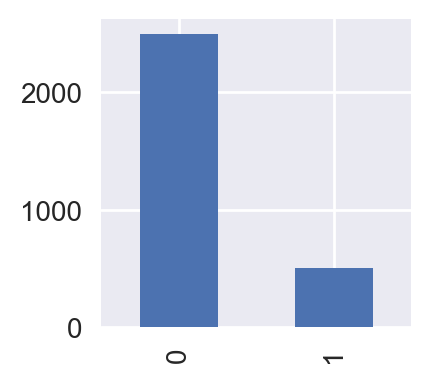

In [4]:
# визуализируем результат
df['label'].value_counts().plot(
    kind='bar',
    grid=True,
    figsize=(2, 2)
    );

**Выводы:**
- всего 3000 писем
- спам в 500 письмах
- имеется 1 явный пропуск в признаке **email** (отмечен как спам)
- классы несбалансированы

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [5]:
# все необходимые модули уже подгружены выше

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [6]:
# сделаем копию датасета
df_copy = df.copy()

# убираем пропуски с краев строки; если в строке только пропуски, то получим ''
df_copy['email'] = df_copy['email'].str.strip()
# пустые строки заменяем на NaN
df_copy['email'] = df_copy['email'].apply(lambda x: np.nan if x == '' else x)

# удаляем строки с пропущенными значениями
df_copy.dropna(inplace=True)

print(f'Размерность данных: {df_copy.shape}')

Размерность данных: (2997, 2)


Переводим данные в векторный вид:

In [7]:
# задаем векторизатор
vectorizer = CountVectorizer()
# обучив векторизатор, получаем матрицу с предикторами (новыми признаками)
X = vectorizer.fit_transform(df_copy["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [8]:
X.shape[1]

34116

**Выводы:**
- признак **email** был очищен от явных и неявных пропусков
- пропущенные значения (всего в 3 строках) были удалены
- проведена векторизация признака **email**, получено 34116 признаков (матрица наблюдений X)

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [9]:
# матрица с предикторами уже определена выше

# определим целевую переменную
y = df_copy['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [10]:
# проводим разбиение данных на обучающую и тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [11]:
# рассчитываем среднее целевой переменной, 
# округлив до 3-го знака после запятой
round(y_test.mean(),3)

0.165

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [12]:
# обучаем алгоритм MultinomialNB
multinomial_clf = MultinomialNB(alpha=0.01)
multinomial_clf.fit(X_train, y_train)
# предсказваем целевую переменную
y_test_pred_multinomial_clf = multinomial_clf.predict(X_test)

# обучаем алгоритм ComplementNB
complement_clf = ComplementNB(alpha=0.01)
complement_clf.fit(X_train, y_train)
# предсказваем целевую переменную
y_test_pred_complement_clf = complement_clf.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [13]:
# список с векторами предсказанных таргетов
predict_names = [y_test_pred_multinomial_clf, y_test_pred_complement_clf]
# список с названиями алгоритмов
signatures = ['MultinomialNB','ComplementNB']

# выводим метрики обоих алгоритмов на тестовой выборке
for i in range(2):
    print(f'* {signatures[i]} *')
    print(f"Accuracy: {accuracy_score(y_test, predict_names[i])}")
    print(f"Precision: {precision_score(y_test, predict_names[i])}") 
    print(f"Recall: {recall_score(y_test, predict_names[i])}")
    print(f"F1-score: {f1_score(y_test, predict_names[i])}")
    print('-'*20)

* MultinomialNB *
Accuracy: 0.9866666666666667
Precision: 1.0
Recall: 0.9193548387096774
F1-score: 0.9579831932773109
--------------------
* ComplementNB *
Accuracy: 0.988
Precision: 1.0
Recall: 0.9274193548387096
F1-score: 0.9623430962343097
--------------------


**Примечание:** полученные метрики не совпадают с эталонными в задании 6.6 (accuracy = 0.993, precision = 0.991)

Нарисуйте ROC-кривую:

MultinomialNB: ROC AUC=0.995
ComplementNB: ROC AUC=0.995


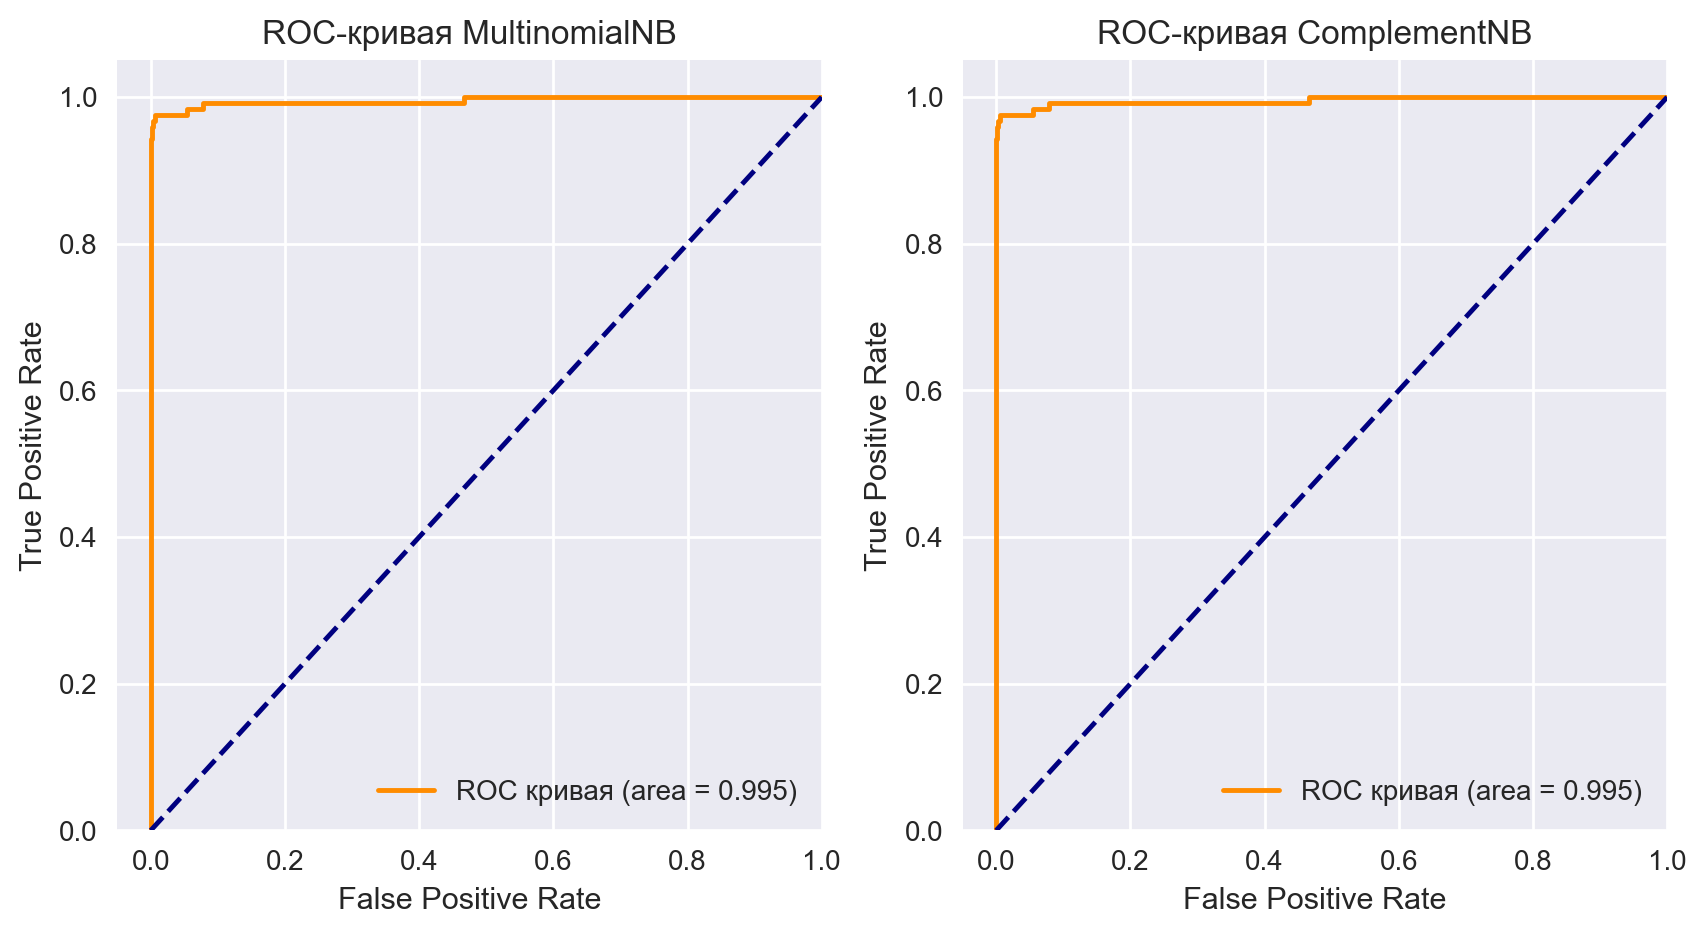

In [14]:
# список с обученными моделями
model_names = [multinomial_clf, complement_clf]

# выведем диаграммы признаков
plt.figure(figsize=(10, 5)) # размер диаграммы
for i in range(2):
    model_name = model_names[i] # обученная модель
    signature = signatures[i] # название алгоритма модели
    # получаем предказания
    probs = model_name.predict_proba(X_test)
    # сохраняем вероятности только для положительного исхода
    probs = probs[:, 1]
    # рассчитываем ROC AUC
    model_auc = roc_auc_score(y_test, probs)
    print(f'{signature}: ROC AUC=%.3f' % (model_auc))
    # рассчитываем roc-кривую
    fpr, tpr, treshold = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    # строим график
    plt.subplot(1, 2, i+1) # диаграмма размерностью 1х2, индекс текущего графика (1 или 2)
    plt.plot(fpr, tpr, color='darkorange',
            label='ROC кривая (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-кривая {signature}')
    plt.legend(loc="lower right")
plt.show();

**Выводы:**
- обучены 2 подходящих алгоритма MultinomialNB и ComplementNB
- в целом оба алгоритма показали хорошие и схожие метрики в решении задачи классификации
- ROC-кривые обеих моделей практически идентичны и площадь под ней одинаковая

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

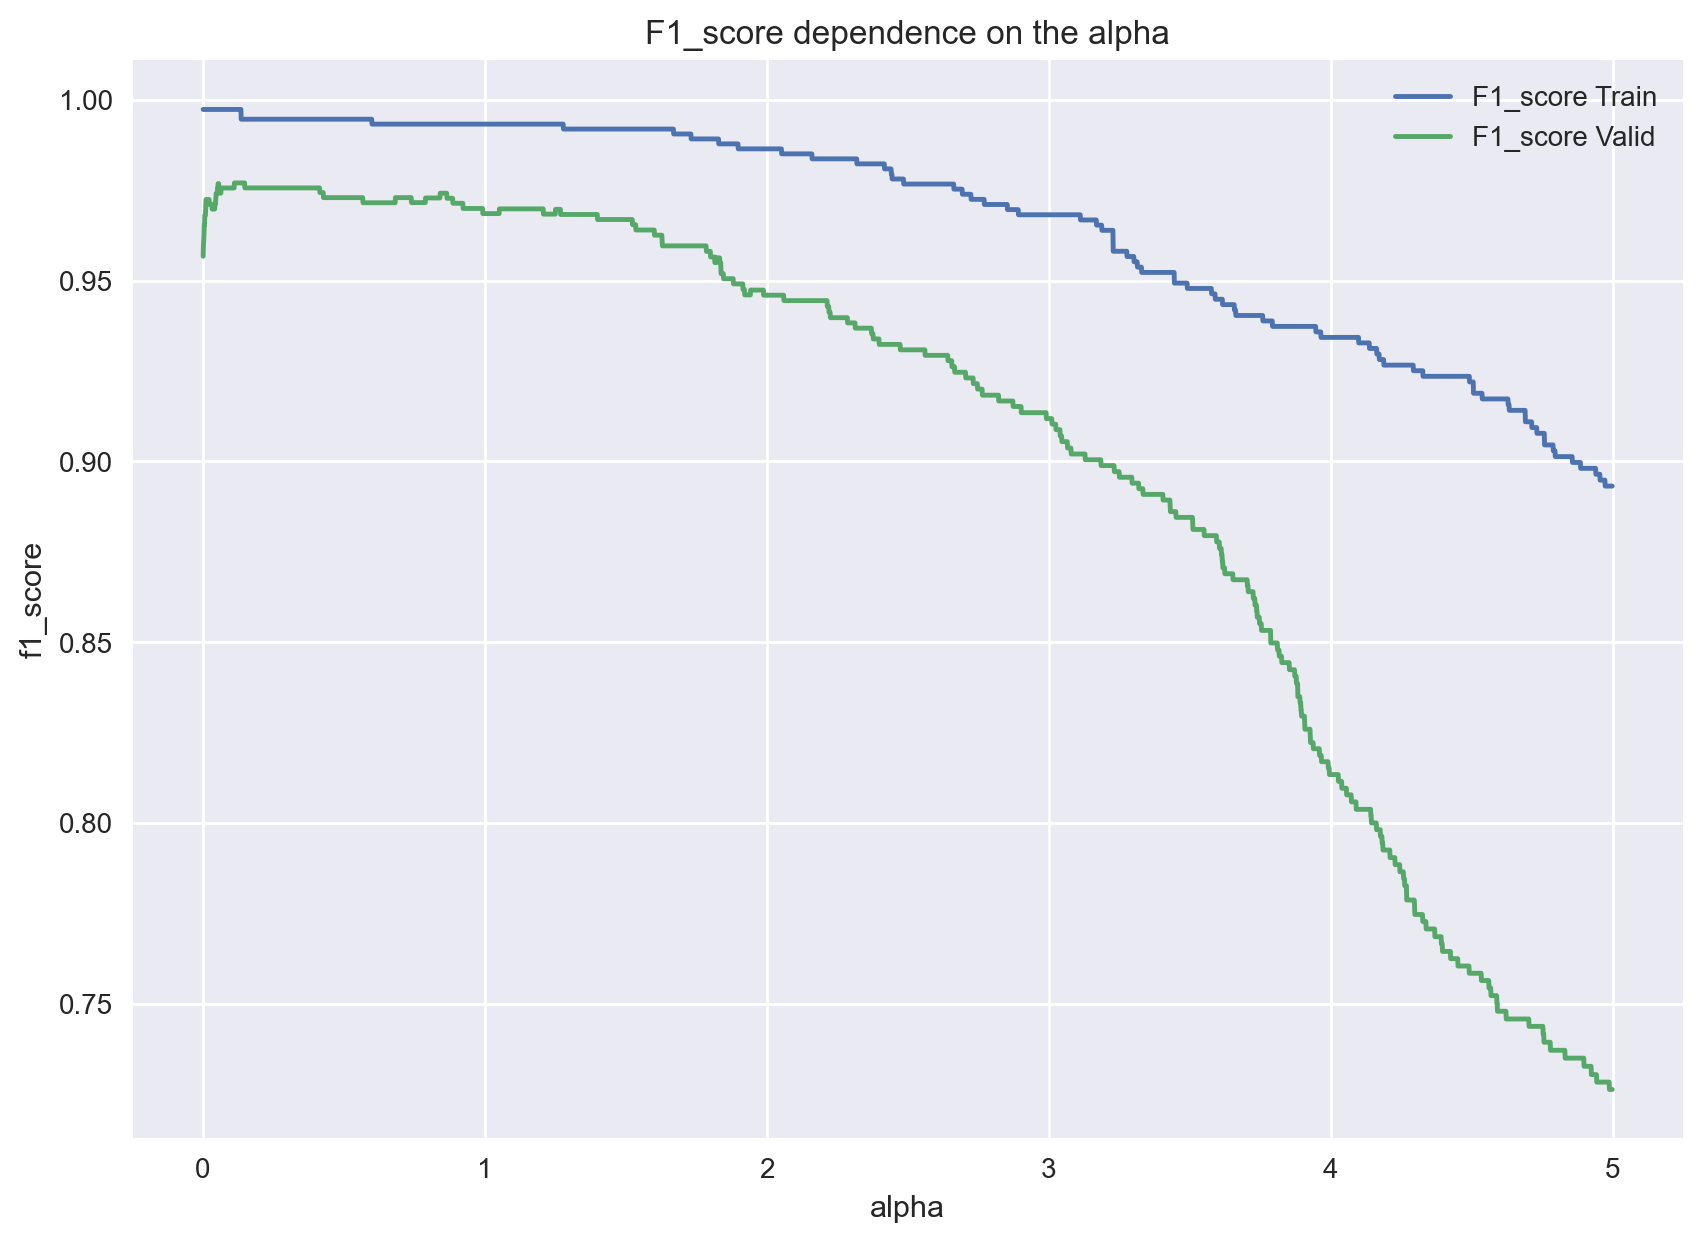

In [15]:
# качество классификации оценим на алгоритме MultinomialNB, метрика - f1_score

# создаём и фиксируем объект кросс-валидатора KFold
kf = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# список со значениями метрики на тренировочной выборке
f1_train_list = []
# список со значениями метрики на валидационной выборке
f1_valid_list = []
# список со значениями параметра alpha
alpha_list = []

alpha = 0.001 # начальное значение параметра alpha

# рассчитываем метрику пока alpha <= 5 с шагом 0.001
while alpha <= 5:
    # обучаем модель на основе алгоритма MultinomialNB с новым значением alpha
    multinomial_clf = MultinomialNB(alpha=alpha)
    multinomial_clf.fit(X_train, y_train)

    # предсказываем таргет на тренировочной выборке
    y_train_pred = multinomial_clf.predict(X_train)
    # предсказываем таргет на валидационной выборке (используем кросс-валидацию), получаем сразу метрики, берем среднее по метрикам
    y_cv_valid_mean = np.mean(model_selection.cross_val_score(multinomial_clf, X_train, y_train, cv=kf, scoring='f1'))

    # рассчитываем метрику на тренировочной выборке
    f1_train = f1_score(y_train, y_train_pred)
    
    # добавляем значения метрик в соответствующие списки
    f1_train_list.append(f1_train)
    f1_valid_list.append(y_cv_valid_mean)

    # добавляем текущее значение alpha в список и обновляем его для новой итерации
    alpha_list.append(alpha)
    alpha += 0.001

# визуализируем полученные данные
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(alpha_list, f1_train_list, label='F1_score Train')
ax.plot(alpha_list, f1_valid_list, label='F1_score Valid')
ax.set_title('F1_score dependence on the alpha')
ax.set_xlabel('alpha')
ax.set_ylabel('f1_score')
ax.legend();

**Выводы:**
- по диаграмме очевидна важность параметра *alpha* для обучения модели
- что касается данного конкретного примера: лучшее значение параметра *alpha* примерно 0.1-0.4, при его увеличении метрики *f1_score* обеих выборок падают (причем сильнее падает валидная метрика) и расходятся 